In [15]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_07/best_maps/weighted_average_flipped_lesions/convergence_maps/agreement_inverted'

# 01 - Begin Analysis

Enter the path to the dictionary generated by Notebook 01

In [16]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_10/unseen_data.json'

What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

In [17]:
correlation = 'spearman'

In [18]:
from calvin_utils.ccm_utils.npy_utils import DataLoader
from calvin_utils.ccm_utils.stat_utils import CorrelationCalculator
data_loader = DataLoader(dict_path)
correlation_calculator = CorrelationCalculator(method=correlation, verbose=False)
corr_map_dict = correlation_calculator.generate_correlation_maps(data_loader)

Evaluating Alzheimer Fornix DBS
Evaluating Epilepsy Hypometabolism
Evaluating Elderly Parietal TMS


# 02 - Use LOOCV to Train a Convergent Map on N-1 Datasets, Then Test it on the Nth dataset

Enter a list of datasets you want to flip (multiply correlation map by -1)
- This is typically done to control for sign inversion, enabling testing of topology specifically. 

In [19]:
datasets_to_flip = [] #'fornix_memory', 'adni_Alzheimer', 'corbetta_memory', 'grafmann_memory', 'manitoba_memory', 'ms_memory', 'kim_tms', 'hebscher_tms']

Generate the Convergent Maps and Save the Individual Correlation Maps

In [30]:
from calvin_utils.ccm_utils.ccm_utils import LOOCVAnalyzer
loocv_analyzer = LOOCVAnalyzer(corr_map_dict, data_loader, 
                               similarity='cosine',
                               optimizer=False,
                               method=correlation, n_bootstrap=1000, 
                               out_dir=out_dir,
                               weight=False,
                               mask_path='/Users/cu135/hires_backdrops/MNI/MNI152_T1_2mm_brain_mask.nii',
                               roi_path='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_07/best_maps/weighted_average_flipped_lesions/convergence_maps/weighed/all_datasets_agreement_map.nii',
                               datasets_to_flip=datasets_to_flip,
                               align_all_maps=True
                               )

Removing NaNS from self.coor_map_dict.


Run LOOCV

<Figure size 432x432 with 0 Axes>

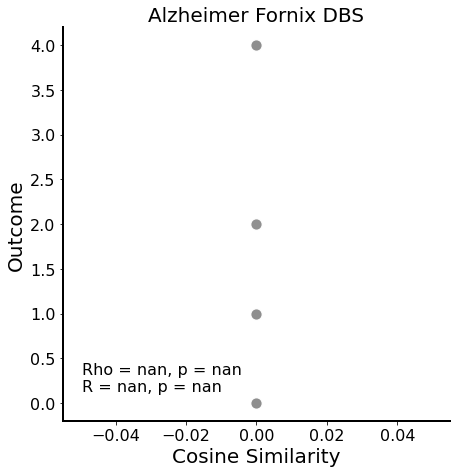

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 41701.17it/s]


<Figure size 432x432 with 0 Axes>

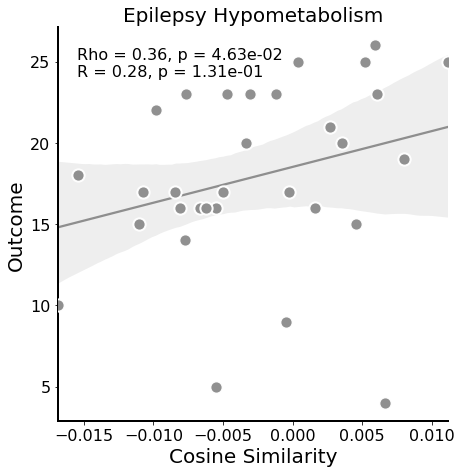

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6258.45it/s]


<Figure size 432x432 with 0 Axes>

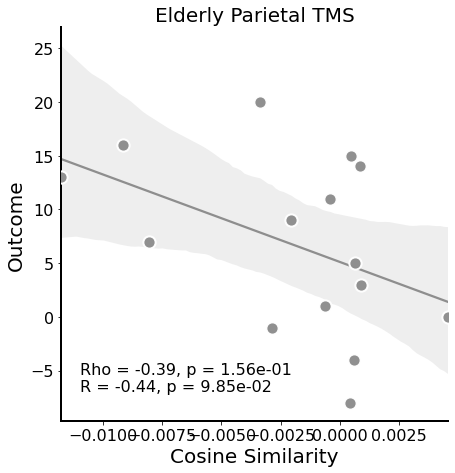

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6317.27it/s]


,Dataset,CI Lower,CI Upper,Mean R
0,Alzheimer Fornix DBS,NaN,NaN,NaN
1,Epilepsy Hypometabolism,-0.027156,0.655426,0.360509
2,Elderly Parietal TMS,-0.177987,0.739602,0.385714


In [31]:
loocv_analyzer.run(False)
display(loocv_analyzer.results_df)

That's all

-Calvin